,city,x,y
0,San Francisco,5.513656e+05,4.181936e+06
1,Los Angeles,9.385837e+05,3.777893e+06
2,Oklahoma City,2.833852e+06,4.239858e+06
3,Dallas,2.988069e+06,3.949013e+06
4,Detroit,3.798415e+06,5.533473e+06
5,Miami,5.045288e+06,3.693890e+06
6,New York City,4.676500e+06,5.844604e+06


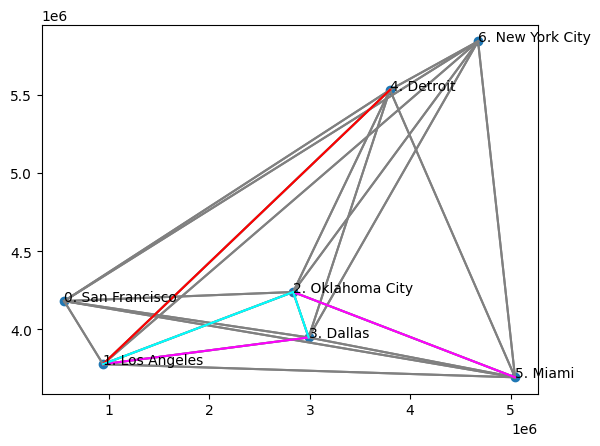

In [1]:
from IPython.core.display_functions import display
from containers.cities import CitiesGraph

path = "data/cities.csv"
graph = CitiesGraph.from_file(path, [
    "Dallas",
    "Detroit",
    "Los Angeles",
    "Miami",
    "New York City",
    "Oklahoma City",
    "San Francisco",
])
display(graph.cities.coords)
graph.fully_connect()
graph.plot_cities(with_index=True)
graph.plot_connections(color="grey")
graph.plot_segment(1, 4, color='r')
graph.plot_segments([(1, 3), (2, 5)], color='magenta')
graph.plot_line([1, 2, 3], color='cyan')
plt.show()

In [2]:
from algorithms import tsp


def find_best_path(graph: CitiesGraph, plot: bool = False) -> tsp.Sequence:
    """Find best path to go to all cities withing CitiesGraph"""
    sequence = tsp.find_best_sequence(
        graph.get_nodes(),
        costs=graph.get_distances_by_segments(),
    )
    if plot:
        show_sequence_in_graph(graph, sequence)
    return sequence


def show_sequence_in_graph(graph: CitiesGraph, sequence: tsp.Sequence) -> None:
    """Plot a sequence of moves within a graph of cities"""
    graph.plot_cities(with_index=True)
    graph.plot_connections(color="grey")
    graph.plot_line(sequence, color='cyan')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()


'find_best_sequence' run took 0.00439s [7 items]


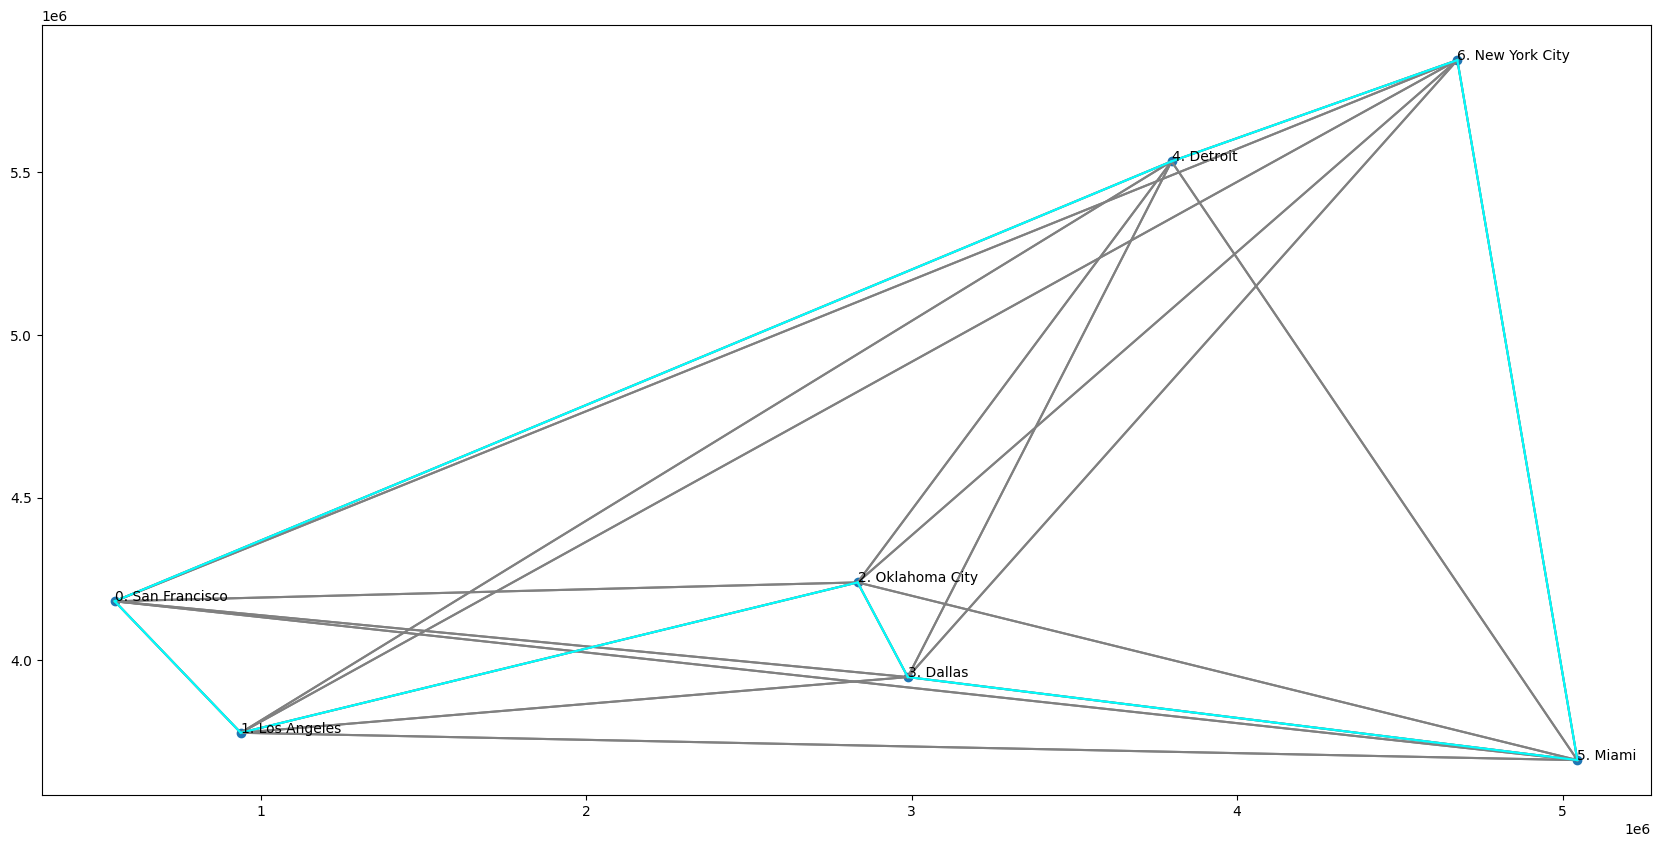

[0, 1, 2, 3, 5, 6, 4, 0]

In [3]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [30, 10]

graph.fully_connect()
find_best_path(graph, plot=True)

'find_best_sequence' run took 0.03890s [7 items]


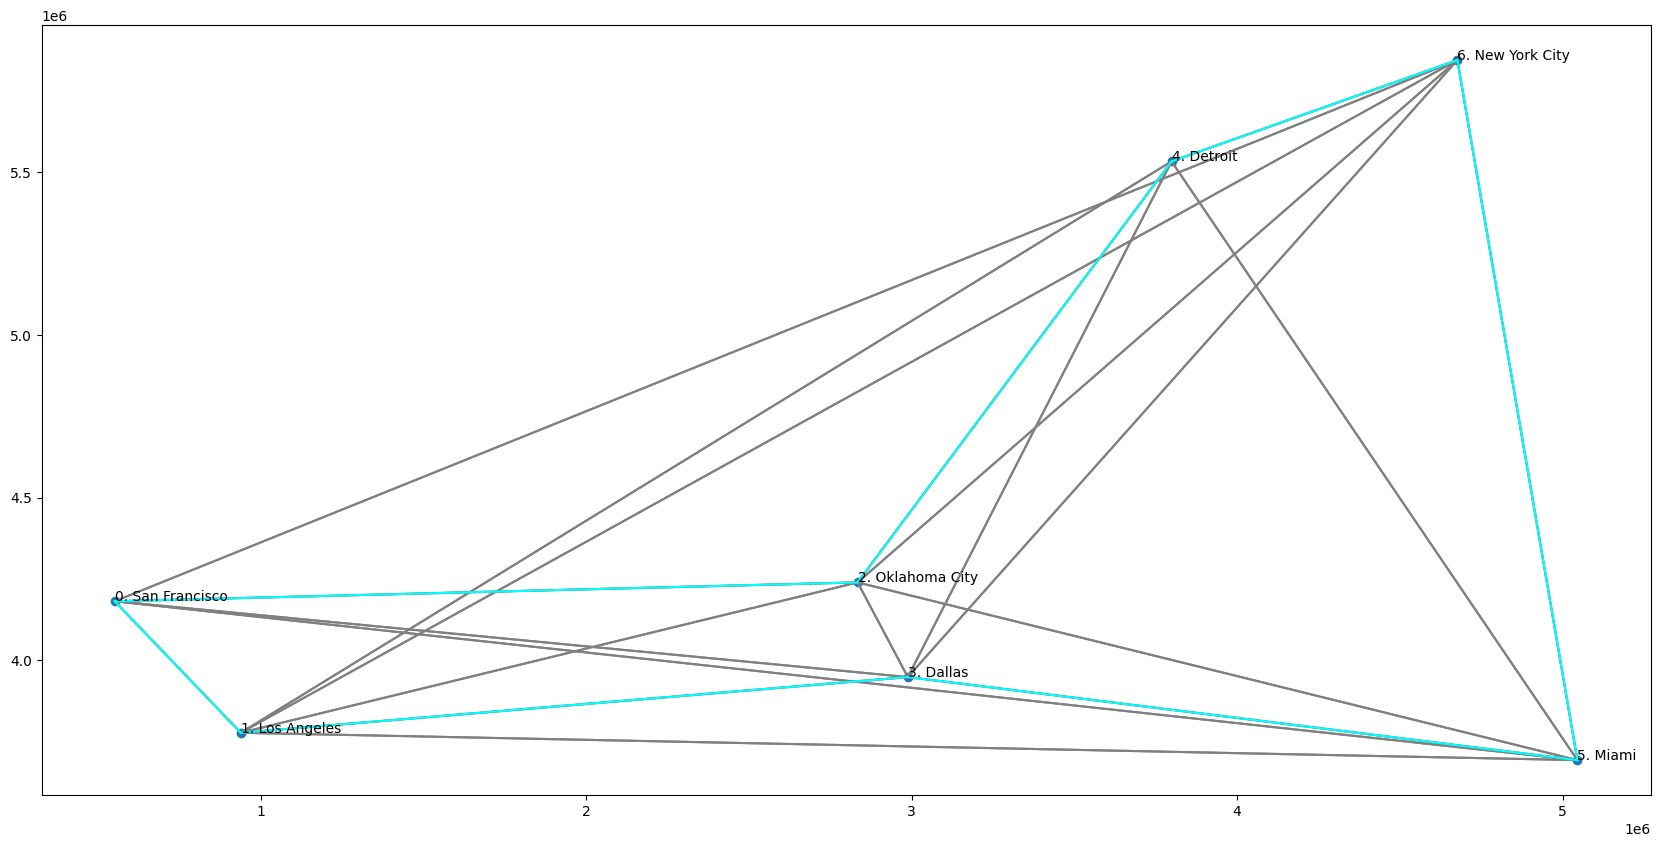

[0, 1, 3, 5, 6, 4, 2, 0]

In [4]:
from containers.cities import Connection

graph.fully_connect()
graph.connections.remove(Connection(0, 4, -1))
graph.connections.remove(Connection(4, 0, -1))
find_best_path(graph, plot=True)